In [1]:
%tensorflow_version 2.x
import tensorflow as tf

from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

import numpy as np
import matplotlib.pyplot as plt

TensorFlow 2.x selected.


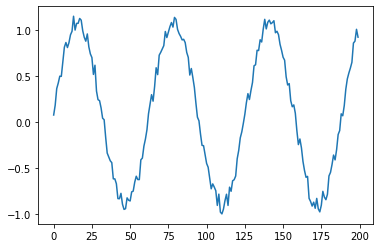

In [2]:
# Create a sin wave along with some noise
series = np.sin(0.1 * np.arange(200)) + (np.random.random(200) * 0.2)
plt.plot(series)

In [3]:
T = 10
X = []
Y = []
for t in range(len(series) - T):
  x = series[t:t+T] # window
  X.append(x) # push the group into the real X dataset
  # The target is the last element in the window
  y = series[t+T] # the last element of the group will be in the index of t+T
  Y.append(y)

# convert lists to numpy array
X = np.array(X).reshape(-1, T)
Y = np.array(Y)
N = len(X)

# print out the shapes
print('X shape:', X.shape, 'Y shape:', Y.shape )

X shape: (190, 10) Y shape: (190,)


In [4]:
i = Input(shape = (T,))
x = Dense(1)(i)
model = Model(i, x)
model.compile(optimizer = tf.keras.optimizers.Adam(lr = 0.1), loss = 'mse')

r = model.fit(X[:-N//2], Y[:-N//2], epochs = 80, validation_data = (X[-N//2:], Y[-N//2:]))

Train on 95 samples, validate on 95 samples
Epoch 1/80
95/95 [==============================] - 0s 3ms/sample - loss: 0.3230 - val_loss: 0.1612
Epoch 2/80
95/95 [==============================] - 0s 169us/sample - loss: 0.1375 - val_loss: 0.1447
Epoch 3/80
95/95 [==============================] - 0s 148us/sample - loss: 0.1381 - val_loss: 0.0150
Epoch 4/80
95/95 [==============================] - 0s 148us/sample - loss: 0.0445 - val_loss: 0.0975
Epoch 5/80
95/95 [==============================] - 0s 155us/sample - loss: 0.0623 - val_loss: 0.0155
Epoch 6/80
95/95 [==============================] - 0s 145us/sample - loss: 0.0407 - val_loss: 0.0472
Epoch 7/80
95/95 [==============================] - 0s 151us/sample - loss: 0.0371 - val_loss: 0.0236
Epoch 8/80
95/95 [==============================] - 0s 151us/sample - loss: 0.0302 - val_loss: 0.0243
Epoch 9/80
95/95 [==============================] - 0s 152us/sample - loss: 0.0187 - val_loss: 0.0173
Epoch 10/80
95/95 [=====================

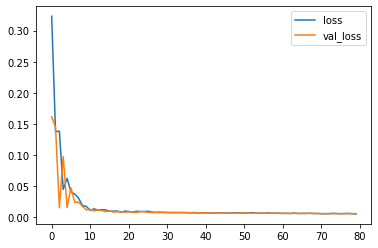

In [5]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()

In [0]:
validation_target = Y[-N//2:]
validation_preds = []
last_x = X[-N//2]

while len(validation_preds) < len(validation_target):
  p = model.predict(last_x.reshape(1, -1))[0,0]

  validation_preds.append(p)
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

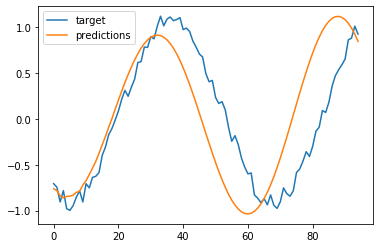

In [7]:
plt.plot(validation_target, label = 'target')
plt.plot(validation_preds, label = 'predictions')
plt.legend()
plt.show()